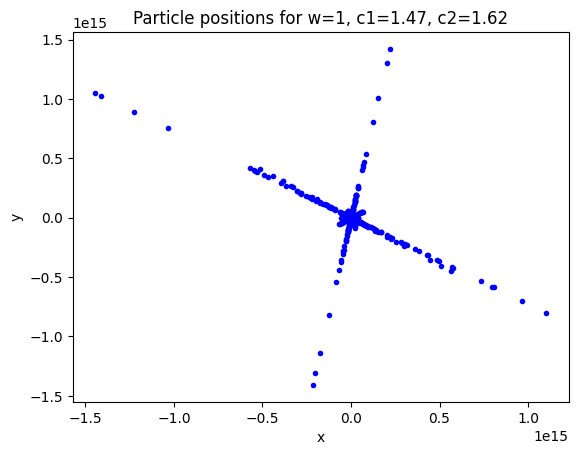

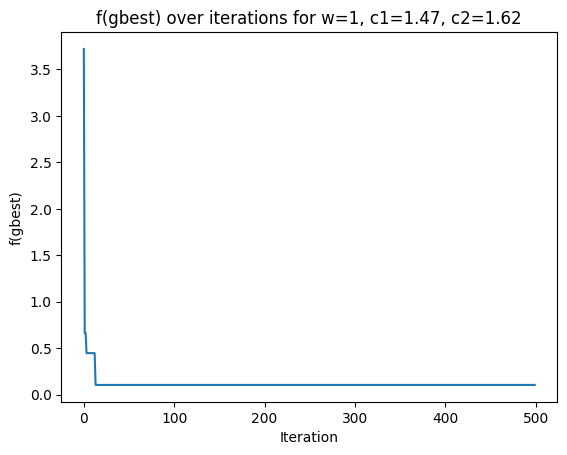

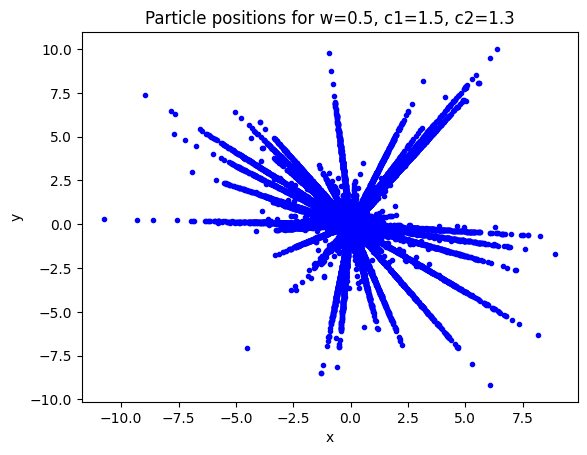

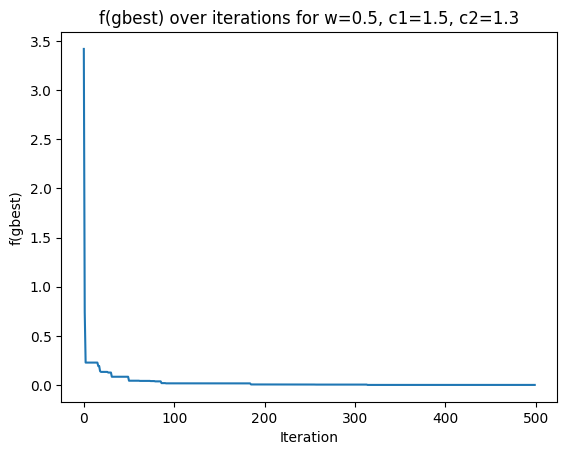

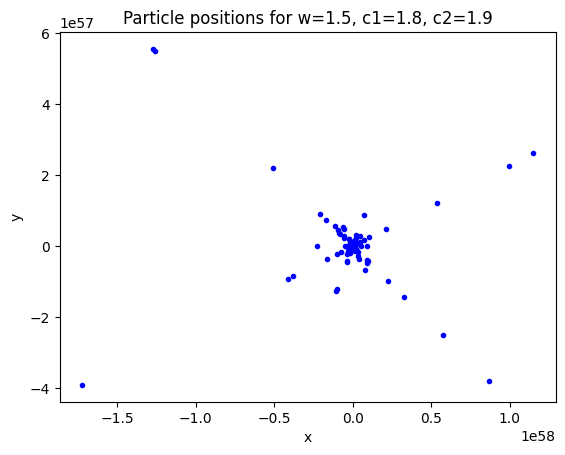

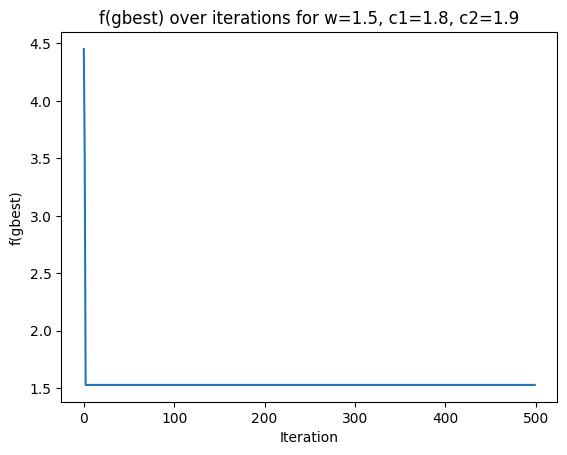

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ackley_function(x, y):
    """
    Ackley function for optimization.

    Parameters:
    - x (float): First dimension of the input.
    - y (float): Second dimension of the input.

    Returns:
    - float: Value of the Ackley function at the given input.
    """
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + 20 + np.exp(1)

def pso_algorithm(w, c1, c2, max_iter):
    """
    Particle Swarm Optimization algorithm for optimizing the Ackley function.

    Parameters:
    - w (float): Inertia weight.
    - c1 (float): Cognitive parameter.
    - c2 (float): Social parameter.
    - max_iter (int): Maximum number of iterations.

    Returns:
    - tuple: Global best position, global best value, list of global best values over iterations, list of particle positions over iterations.
    """
    num_particles = 30
    dimensions = 2
    lb, ub = -5, 5  # Search space boundaries

    # Initialize particles and velocities
    particles = np.random.uniform(lb, ub, (num_particles, dimensions))
    velocities = np.random.rand(num_particles, dimensions)
    
    pbest_positions = particles.copy()
    pbest_values = np.zeros(num_particles)
    gbest_position = np.zeros(dimensions)
    gbest_value = np.inf
    
    # Lists to store data for plotting
    gbest_values = []
    particle_positions = []

    for _ in range(max_iter):
        for i in range(num_particles):
            fitness = ackley_function(particles[i, 0], particles[i, 1])

            if fitness < pbest_values[i]:
                pbest_values[i] = fitness
                pbest_positions[i] = particles[i, :].copy()

            if fitness < gbest_value:
                gbest_value = fitness
                gbest_position = particles[i, :].copy()

        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i, :] = w * velocities[i, :] + c1 * r1 * (pbest_positions[i, :] - particles[i, :]) + c2 * r2 * (gbest_position - particles[i, :])
            particles[i, :] = particles[i, :] + velocities[i, :]
            
        # Append data for plotting
        gbest_values.append(gbest_value)
        particle_positions.append(particles.copy())

    return gbest_position, gbest_value, gbest_values, particle_positions

# Set parameters
w_values = [1, 0.5, 1.5]  # Try other values of inertia weight
c1_values = [1.47, 1.5, 1.8]  # Try other values of cognitive parameter
c2_values = [1.62, 1.3, 1.9]  # Try other values of social parameter
max_iter = 500

# Run PSO with different parameter values
for w, c1, c2 in zip(w_values, c1_values, c2_values):
    gbest_position, gbest_value, gbest_values, particle_positions = pso_algorithm(w, c1, c2, max_iter)

    # Plot the particles
    for i in range(max_iter):
        plt.scatter(particle_positions[i][:, 0], particle_positions[i][:, 1], c='b', marker='.')
    plt.title(f'Particle positions for w={w}, c1={c1}, c2={c2}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Plot the global best values over iterations
    plt.plot(gbest_values)
    plt.title(f'f(gbest) over iterations for w={w}, c1={c1}, c2={c2}')
    plt.xlabel('Iteration')
    plt.ylabel('f(gbest)')
    plt.show()
